________

# Religious Events or Traditions
______


Answer a question with the broad topic of **religious events or traditions** for the region of **Bogotá, Bogota D.C., Colombia**, or **Colombia** more broadly.


## Region and Domain:

- **Region**: Bogota D.C., Colombia 

- **Domain**: religious events or traditions

## Datasets: 

If you [CLICK](https://www.vanderbilt.edu/lapop/Colombia_AmericasBarometer_2018-19_Technical_Report_W_101019.pdf) in this link you will find the Technical report for this dataset. All [LAPOP](https://www.vanderbilt.edu/lapop/colombia.php) datasets can be downloaded here:

 - [Data sets](http://datasets.americasbarometer.org/database/index.php)

And, in the search box type **Colombia** and it will give you the data by years.


> Bear in mind that the data sets are '''filename.dta ''' which means they are STATA extentions. \\\
> Therefore, we are going to use **Pandas** to open them

In [ ]:
# To open .dta files and save the .csv
import pandas as pd
data = pd.io.stata.read_stata('Colombia LAPOP AmericasBarometer 2018 v1.0_W.dta')
data.to_csv('Colombia LAPOP AmericasBarometer 2018 v1.0_W.csv')

### Understanding the DataSet

Now, in orden to understant the data you need to follow the survay that is displayed in this [LINK SURVAY](https://www.vanderbilt.edu/lapop/colombia/ABCol18-v9.0.5.6-Spa-180924_W.pdf). And, even Though it is in Spanish, we only need a few questions for this short analisis.

This is, the data is going to be worked out in the followiing way:  

1. Divide by Region : 
    - (811) Atlántica
    - (812) Bogotá
    - (813) Central
    - (814) Oriental
    - (815) Pacífica
    - (816) Amazonía Orinoquía
    

2. Divide by Question Type: 

        
   - **Q3CN**:  Si usted es de alguna religión, ¿podría decirme cuál es su religión? (If you believe in any religion, which one?) 
       - (01) Católico
       - (02) Protestante, Protestante Tradicional o Protestante no Evangélico (Cristiano, Calvinista; Luterano; Metodista; Presbiteriano; Discípulo de Cristo; Anglicano; Episcopaliano; Iglesia Morava).
       - (03) Religiones Orientales no Cristianas (Islam; Budista; Hinduista; Taoísta; Confucianismo;Baha’i).
       - (05) Evangélica y Pentecostal (Evangélico, Pentecostal; Iglesia de Dios; Asambleas de Dios; Iglesia Universal del Reino de Dios; Iglesia Cuadrangular; Iglesia de Cristo; Congregación Cristiana; Menonita; Hermanos de Cristo; Iglesia Cristiana Reformada; Carismático no Católico; Luz del Mundo; Bautista; Iglesia del Nazareno; Ejército de Salvación; Adventista; Adventista del Séptimo Día, Sara Nossa Terra).
       - (07) Religiones Tradicionales (Santería, Candomblé, Vudú, Rastafari, Religiones Mayas, Umbanda; María Lonza; Inti, Kardecista, Santo Daime, Esoterica).
       - (04) Ninguna (Cree en un Ser Superior pero no pertenece a ninguna religión)
       - (11) Agnóstico o ateo (no cree en Dios)
       - (77) Otro 
             
   - **Q5B**: Por favor, ¿podría decirme, qué tan importante es la religión en su vida? (Could you tell How important is Religion in your life?)
      - (1) Muy importante (very important)
      - (2) Algo importante (important)
      - (3) Poco importante (no so important)
      - (4) Nada importante (No importnat at all)
      - (888888) No sabe [NO LEER] (Do not know [Don't Read]) 
      - (988888) No responde [NO LEEO] (Do not ansewered [Don't Read])
   
   
3. Divide by Gender aveilable (Correspond to question **Q1**):
    - Female
    - Male
    



### Question Q5B: Could you tell How important is Religion in your life? 

<IPython.core.display.Javascript object>


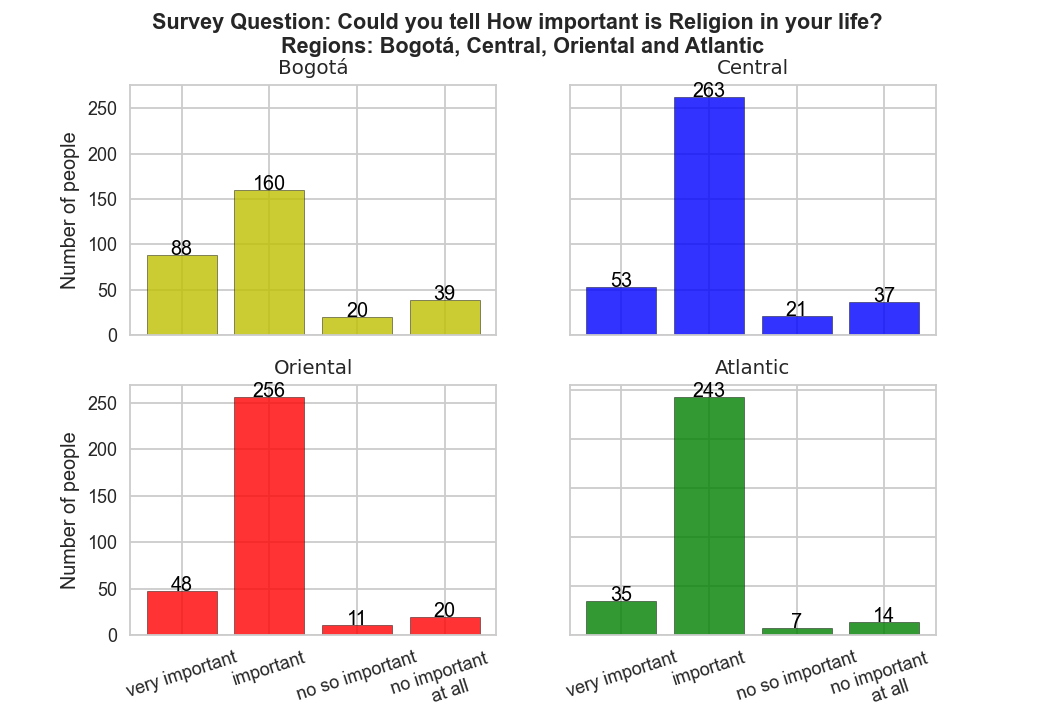

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


#------------------DataFrame----------------------

df = pd.read_csv('Colombia LAPOP AmericasBarometer 2018 v1.0_W.csv')

Bogota=df[df.estratopri.isin(['Bogotá'])]
Central=df[df.estratopri.isin(['Central'])]
Oriental=df[df.estratopri.isin(['Oriental'])]
Atlantica=df[df.estratopri.isin(['Atlántica'])]


def InfoDF(DataFrame):
    
    df = DataFrame[['sex','cp6','q3cn','q5b']]
    q5b = df.pivot_table(index=['q5b'], aggfunc='size')
    q3cn = df.pivot_table(index=['q3cn'], aggfunc='size')
    
    df_male = df[df.sex.isin(['Hombre'])]
    q5b_male = df_male.pivot_table(index=['q5b'], aggfunc='size')
    q3cn_male = df_male.pivot_table(index=['q3cn'], aggfunc='size')  
    
    df_female = df[df.sex.isin(['female'])]
    q5b_female = df_female.pivot_table(index=['q5b'], aggfunc='size')
    q3cn_female = df_female.pivot_table(index=['q3cn'], aggfunc='size')
     
    return q5b,q3cn, q5b_male, q5b_female, q3cn_male, q3cn_female

q5b_Bog,q3cn_Bog, _, _, _, _ = InfoDF(Bogota)
q5b_Central,q3cn_Central, _, _, _, _ = InfoDF(Central)
q5b_Oriental,q3cn_Oriental, _, _, _, _ = InfoDF(Oriental)
q5b_Atlantica,q3cn_Atlantica, _, _, _, _ = InfoDF(Atlantica)


#---------------------Plots----------------------

plt.style.use('seaborn-whitegrid')


plt.subplots(2, 2, sharey=True,sharex=True)


x_ticks=['very important','important','no so important', 'no important \n at all']
x= np.arange(len(x_ticks))

plt.title

plt.subplot(2, 2, 2)
ax = plt.gca()
bars=plt.bar(x,q5b_Central,width=0.8,align='center',edgecolor='k',color='b',alpha=0.8,label='Central')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), 
        ha='center', color='k', fontsize=11)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
ax.set_title('Central',fontname="Times New Roman Bold",size=11)
#ax.legend()

plt.subplot(2, 2, 1,sharey=ax)
ax = plt.gca()
bars=plt.bar(x,q5b_Bog,width=0.8,align='center',edgecolor='k',color='y',alpha=0.8,label='Bogotá,D.C.')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), 
        ha='center', color='k', fontsize=11)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)
ax.set_ylabel('Number of people')
ax.set_title('Bogotá',fontname="Times New Roman Bold",size=11)
#ax.legend()

plt.subplot(2, 2, 3)
ax = plt.gca()
bars=plt.bar(x,q5b_Oriental,width=0.8,align='center',edgecolor='k',color='r',alpha=0.8,label='Oriental')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), 
        ha='center', color='k', fontsize=11)
    
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(18)  
    
ax.set_xticks(x)
ax.set_xticklabels(x_ticks)
ax.set_ylabel('Number of people')
ax.set_title('Oriental',fontname="Times New Roman Bold",size=11)
#ax.legend()

plt.subplot(2, 2, 4)
ax = plt.gca()
bars=plt.bar(x,q5b_Atlantica,width=0.8,align='center',edgecolor='k',color='g',alpha=0.8,label='Atlántico')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() , str(int(bar.get_height())), 
        ha='center', color='k', fontsize=11)

ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
    
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(18)  
    
ax.set_xticks(x)
ax.set_xticklabels(x_ticks)
ax.set_title('Atlantic',fontname="Times New Roman Bold",size=11)
#ax.legend()

#----------------- Main Title -------------------

plt.suptitle('Survey Question: Could you tell How important is Religion in your life? \n Regions: Bogotá, Central, Oriental and Atlantic',
            size=12,
             fontweight="bold")

#--------------- Save Figure ------------------
plt.savefig('q5b.png')

### Question Q3CN: Which Religion do you believe in?

<IPython.core.display.Javascript object>


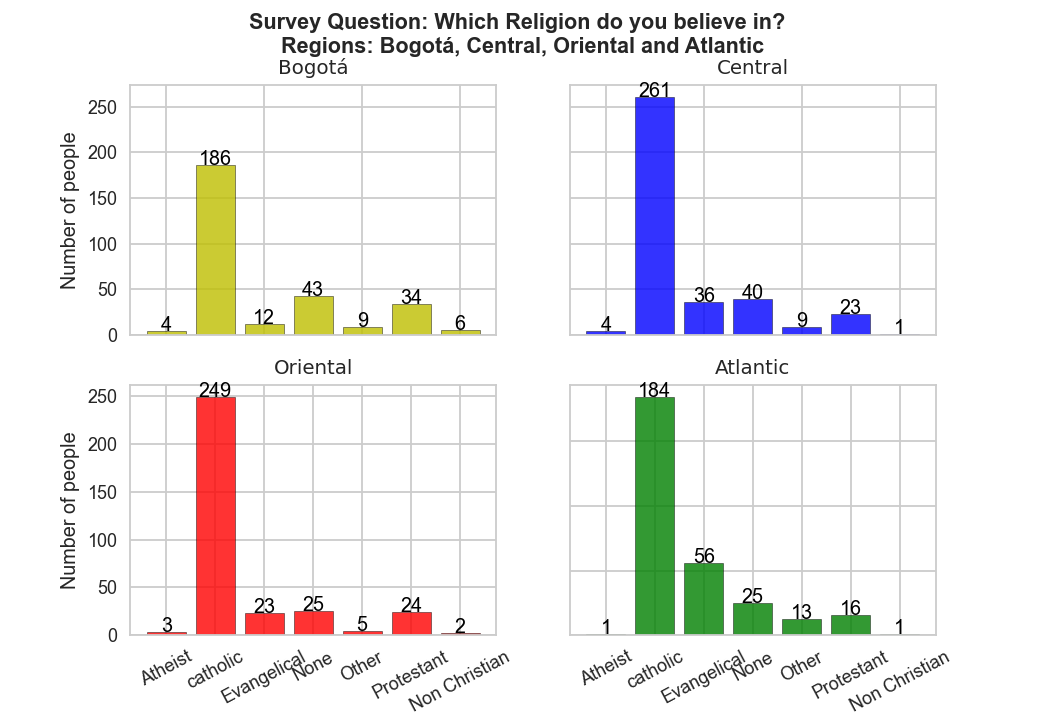

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


#---------------------Plots----------------------

plt.style.use('seaborn-whitegrid')


plt.subplots(2, 2, sharey=True,sharex=True)


x_ticks=['Atheist',
            'catholic',
            'Evangelical',
            'None',
            'Other',
            'Protestant',
            'Non Christian',
           ]
x= np.arange(len(x_ticks))

plt.title

plt.subplot(2, 2, 2)
ax = plt.gca()
bars=plt.bar(x,q3cn_Central,width=0.8,align='center',edgecolor='k',color='b',alpha=0.8,label='Central')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), 
        ha='center', color='k', fontsize=11)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
ax.set_title('Central',fontname="Times New Roman Bold",size=11)
#ax.legend()

plt.subplot(2, 2, 1,sharey=ax)
ax = plt.gca()
bars=plt.bar(x,q3cn_Bog[:-1],width=0.8,align='center',edgecolor='k',color='y',alpha=0.8,label='Bogotá,D.C.')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), 
        ha='center', color='k', fontsize=11)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)
ax.set_ylabel('Number of people')
ax.set_title('Bogotá',fontname="Times New Roman Bold",size=11)
#ax.legend()

plt.subplot(2, 2, 3)
ax = plt.gca()
bars=plt.bar(x,q3cn_Oriental[:-1],width=0.8,align='center',edgecolor='k',color='r',alpha=0.8,label='Oriental')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())), 
        ha='center', color='k', fontsize=11)
    
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(28)  
    
ax.set_xticks(x)
ax.set_xticklabels(x_ticks)
ax.set_ylabel('Number of people')
ax.set_title('Oriental',fontname="Times New Roman Bold",size=11)
#ax.legend()

plt.subplot(2, 2, 4)
ax = plt.gca()
bars=plt.bar(x,q3cn_Atlantica,width=0.8,align='center',edgecolor='k',color='g',alpha=0.8,label='Atlántico')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() , str(int(bar.get_height())), 
        ha='center', color='k', fontsize=11)

ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
    
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(28)  
    
ax.set_xticks(x)
ax.set_xticklabels(x_ticks)
ax.set_title('Atlantic',fontname="Times New Roman Bold",size=11)
#ax.legend()

#----------------- Main Title -------------------

plt.suptitle('Survey Question: Which Religion do you believe in? \n Regions: Bogotá, Central, Oriental and Atlantic',
            size=12,
             fontweight="bold")

#--------------- Save Figure ------------------
plt.savefig('q3cn.png')


### Analisis For Bogotá

In [43]:
df = pd.read_csv('Colombia LAPOP AmericasBarometer 2018 v1.0_W.csv')

# Choose Region you want to: 
# Atlántica, Bogotá, Central, Oriental, Pacífica, or Amazonía Orinoquía

Region=df[df.estratopri.isin(['Bogotá'])]

# Get relevant Columns
Bogota = Region[['sex','cp6','q3cn','q5b']]
Bogota

,sex,cp6,q3cn,q5b
46,Mujer,Una vez a la semana,Católico,Algo importante
47,Hombre,Nunca,Católico,Muy importante
48,Hombre,Una o dos veces al mes,Católico,Muy importante
49,Mujer,Una vez a la semana,Evangélica y Pentecostal,Muy importante
51,Mujer,Una vez a la semana,Católico,Muy importante
...,...,...,...,...
1534,Mujer,Una o dos veces al mes,Otro,Algo importante
1535,Mujer,Nunca,Ninguna (Cree en un Ser Superior pero no perte...,Muy importante
1536,Mujer,Nunca,Católico,Algo importante
1538,Mujer,Nunca,Católico,Muy importante


#### Analisis for each question

In [17]:
# Get the number of people who mark an aswere:
# EXAMPLE:
# q5b: Could you tell How important is Religion in your life?
#q5b[0] (very important)
#q5b[1] (important) 
#q5b[2] (no so important)
#q5b[3] (No importnat at all)

# All Bogota
q5b = Bogota.pivot_table(index=['q5b'], aggfunc='size')
q3cn = Bogota.pivot_table(index=['q3cn'], aggfunc='size')
cp6 = Bogota.pivot_table(index=['cp6'], aggfunc='size')

# By Sex

Bogota_male = Bogota[Bogota.sex.isin(['Hombre'])]
Bogota_female = Bogota[Bogota.sex.isin(['Mujer'])]

#Male
q5b_male = Bogota_male.pivot_table(index=['q5b'], aggfunc='size')
q3cn_male = Bogota_male.pivot_table(index=['q3cn'], aggfunc='size')
cp6_male = Bogota_male.pivot_table(index=['cp6'], aggfunc='size')

#Female
q5b_female = Bogota_female.pivot_table(index=['q5b'], aggfunc='size')
q3cn_female = Bogota_female.pivot_table(index=['q3cn'], aggfunc='size')
cp6_female = Bogota_female.pivot_table(index=['cp6'], aggfunc='size')

### Plot the information

#### q5b: Could you tell How important is Religion in your life?  Bogotá,DC

<IPython.core.display.Javascript object>


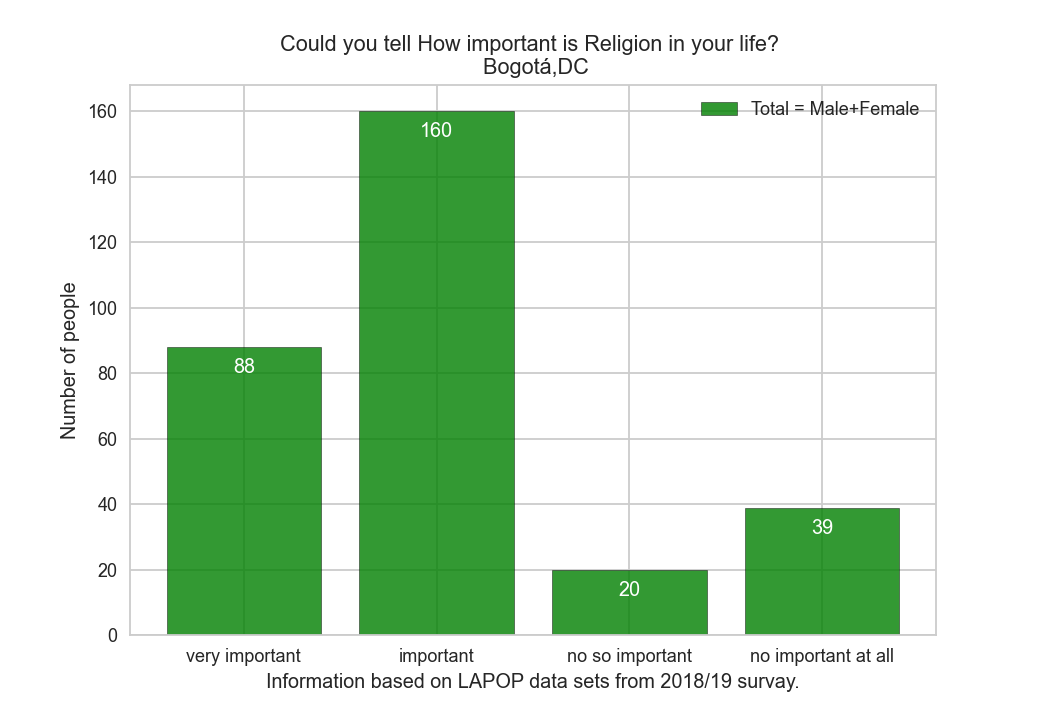

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-whitegrid')

# Bogota information 

# q5b Question
#q5b[0] (very important)
#q5b[1] (important) 
#q5b[2] (no so important)
#q5b[3] (No importnat at all)


q5b_ticks=['very important','important','no so important', 'no important at all']
q5b_x= np.arange(len(q5b_ticks))

plt.figure()
ax = plt.gca()
bars=plt.bar(q5b_x,q5b,width=0.8,align='center',edgecolor='k',color='g',alpha=0.8,label='Total = Male+Female')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 8, str(int(bar.get_height())), 
        ha='center', color='w', fontsize=11)
ax.set_xticks(q5b_x)
ax.set_xticklabels(q5b_ticks)
ax.set_ylabel('Number of people')
ax.set_xlabel('Information based on LAPOP data sets from 2018/19 survay.')
ax.set_title('Could you tell How important is Religion in your life? \n Bogotá,DC')
ax.legend()

#### Analisis by Sex in Bogotá Region

<IPython.core.display.Javascript object>


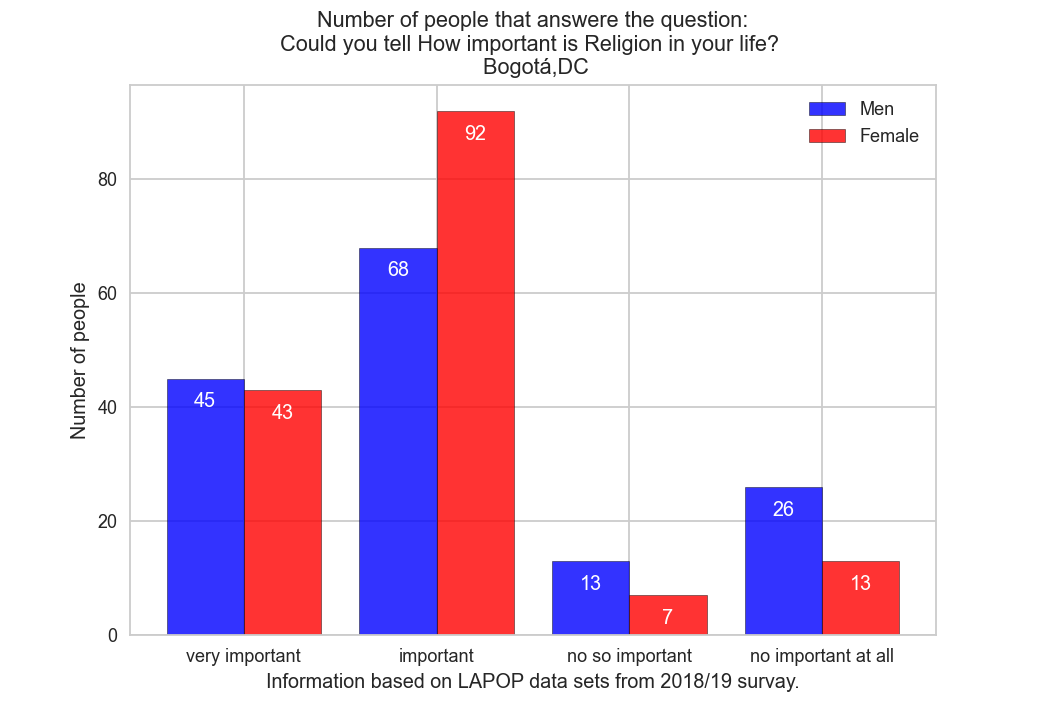

In [33]:
# Male and Female
plt.style.use('seaborn-whitegrid')
plt.figure()
fig=plt.gcf()
ax = plt.gca()

# Ticks
q5b_ticks=['very important','important','no so important', 'no important at all']
q5b_x= np.arange(len(q5b_ticks))

# Ploting
bar1=plt.bar(q5b_x,q5b_male,width=0.4,align='center',edgecolor='k',color='b',alpha=0.8,label='Men')

new_q5b_x=[]
for item in q5b_x:
    new_q5b_x.append(item+0.4)
    
bar2=plt.bar(new_q5b_x,q5b_female,width=0.4,align='center',edgecolor='k',color='r',alpha=0.8,label='Female')


# Custom info
for bar in bar1:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)

for bar in bar2:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())), 
        ha='center', color='w', fontsize=11)

ax.set_xticks(q5b_x+0.2)
ax.set_xticklabels(q5b_ticks)
ax.set_ylabel('Number of people')
ax.set_xlabel('Information based on LAPOP data sets from 2018/19 survay.')
ax.set_title('Number of people that answere the question:\nCould you tell How important is Religion in your life? \n Bogotá,DC')
ax.legend()

### Question q3cn: If you believe in any religion, Could you tell me which one?
#### Bogotá only

In [28]:
q3cn

q3cn
Agnóstico o ateo (no cree en Dios)                                          4
Católico                                                                  186
Evangélica y Pentecostal                                                   12
Ninguna (Cree en un Ser Superior pero no pertenece a ninguna religión)     43
Otro                                                                        9
Protestante, Protestante Tradicional o Protestante no Evangélico           34
Religiones Orientales no Cristianas                                         6
Religiones Tradicionales                                                    1
dtype: int64

<IPython.core.display.Javascript object>


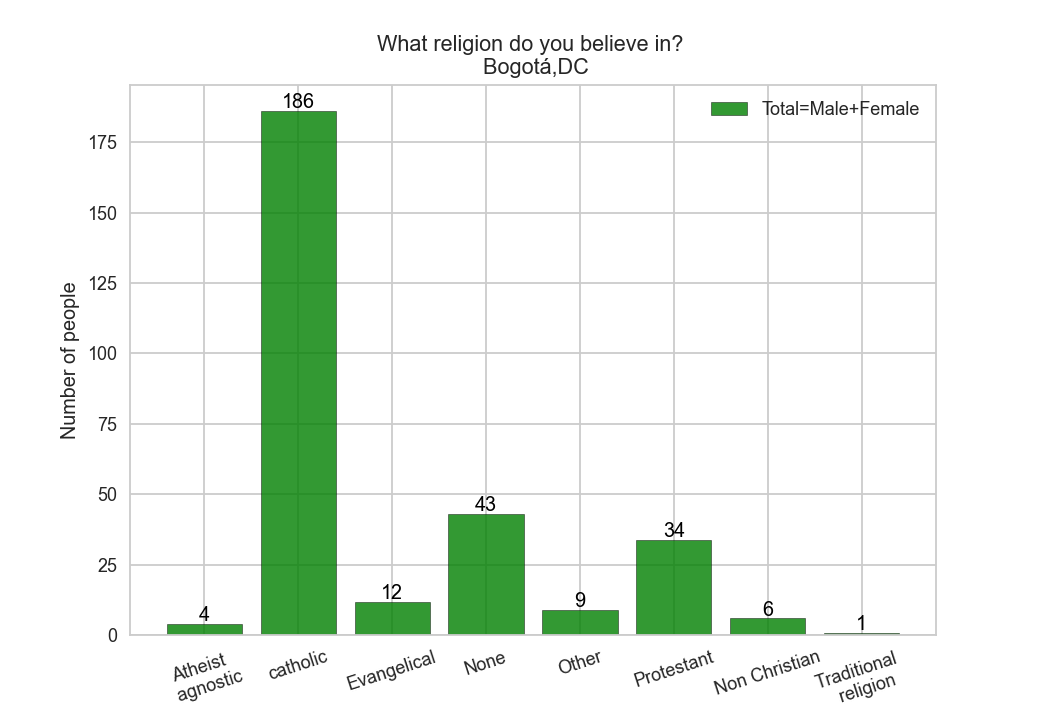

In [31]:
#(01) Católico
#(02) Protestante, Protestante Tradicional o Protestante no Evangélico (Cristiano, Calvinista; Luterano; Metodista; Presbiteriano; Discípulo de Cristo; Anglicano; Episcopaliano; Iglesia Morava).
#(03) Religiones Orientales no Cristianas (Islam; Budista; Hinduista; Taoísta; Confucianismo;Baha’i).
#(05) Evangélica y Pentecostal (Evangélico, Pentecostal; Iglesia de Dios; Asambleas de Dios; Iglesia Universal del Reino de Dios; Iglesia Cuadrangular; Iglesia de Cristo; Congregación Cristiana; Menonita; Hermanos de Cristo; Iglesia Cristiana Reformada; Carismático no Católico; Luz del Mundo; Bautista; Iglesia del Nazareno; Ejército de Salvación; Adventista; Adventista del Séptimo Día, Sara Nossa Terra).
#(07) Religiones Tradicionales (Santería, Candomblé, Vudú, Rastafari, Religiones Mayas, Umbanda; María Lonza; Inti, Kardecista, Santo Daime, Esoterica).
#(04) Ninguna (Cree en un Ser Superior pero no pertenece a ninguna religión)
#(11) Agnóstico o ateo (no cree en Dios)
#(77) Otro

q3cn_ticks=['Atheist \n agnostic',
            'catholic',
            'Evangelical',
            'None',
            'Other',
            'Protestant',
            'Non Christian',
            'Traditional \n religion'
           ]
q3cn_x= np.arange(len(q3cn_ticks))

plt.figure()
ax = plt.gca()
bars=plt.bar(q3cn_x,q3cn,width=0.8,align='center',edgecolor='k',color='g',alpha=0.8,label='Total=Male+Female')

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+1 , str(int(bar.get_height())), 
        ha='center', color='k', fontsize=11)
    
# rotate axis ticks
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(18)    
    
    
ax.set_xticks(q3cn_x)
ax.set_xticklabels(q3cn_ticks)

ax.set_ylabel('Number of people')
ax.set_xlabel('Information based on LAPOP data sets from 2018/19 survey.')
ax.set_title('What religion do you believe in? \n Bogotá,DC')
ax.legend()

<IPython.core.display.Javascript object>


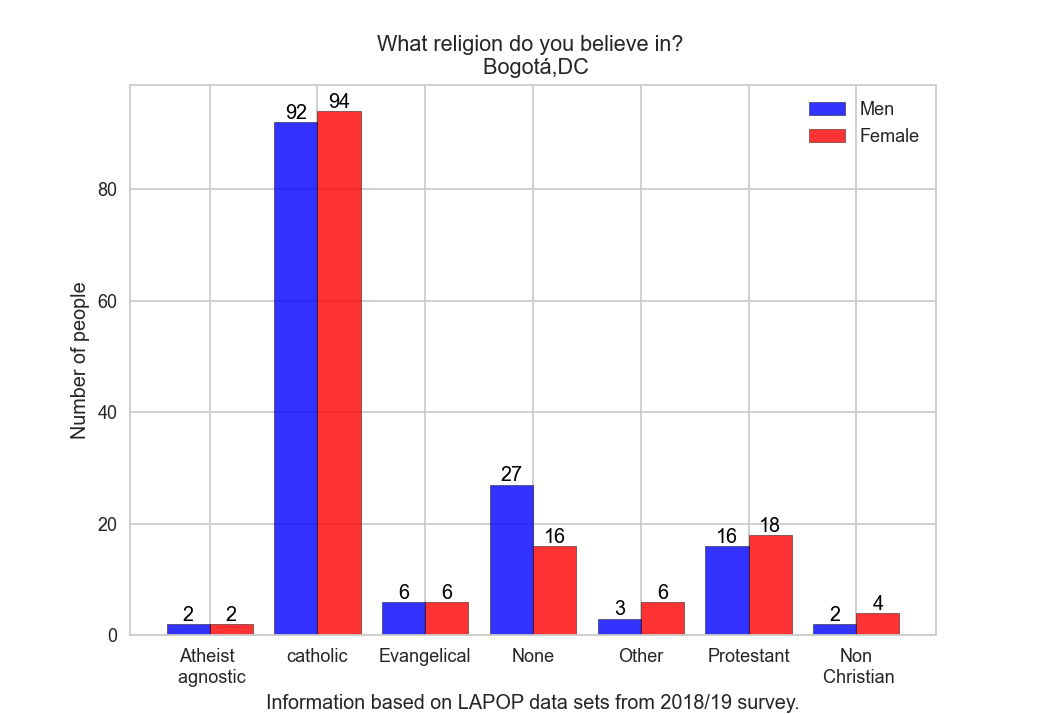

In [32]:
# Male and Female
plt.style.use('seaborn-whitegrid')
plt.figure()
fig=plt.gcf()
ax = plt.gca()

# Ticks
q3cn_ticks=['Atheist \n agnostic',
            'catholic',
            'Evangelical',
            'None',
            'Other',
            'Protestant',
            'Non\n Christian'
           ]
q3cn_x = np.arange(len(q3cn_ticks))

# Ploting
bars1=plt.bar(q3cn_x,q3cn_male,width=0.4,align='center',edgecolor='k',color='b',alpha=0.8,label='Men')

for bar in bars1:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.6, str(int(bar.get_height())), 
    ha='center', color='k', fontsize=11)

new_q3cn_x=[]
for i in q3cn_x:
    new_q3cn_x.append(i+0.4)

bars2=plt.bar(new_q3cn_x,q3cn_female[:-1],width=0.4,align='center',edgecolor='k',color='r',alpha=0.8,label='Female')

for bar in bars2:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+.6 , str(int(bar.get_height())), 
    ha='center', color='k', fontsize=11)


ax.set_xticks(q3cn_x+0.2)
ax.set_xticklabels(q3cn_ticks)
ax.set_ylabel('Number of people')
ax.set_xlabel('Information based on LAPOP data sets from 2018/19 survey.')
ax.set_title('What religion do you believe in? \n Bogotá,DC')
ax.legend()